#  나이브 베이즈 분류기 및 워드클라우드 시각화
## 2021 지능정보시스템

In [1]:
import pandas as pd
import numpy as np

import requests # 예전에 했었던 request를 임포트해서 사용
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
from urllib import parse
import time
from IPython.display import Image

### res.status_code 응답 코드 

In [4]:
base_url = 'https://movie.naver.com/movie/point/af/list.nhn?&page={}'
url = base_url.format(1)
res=requests.get(url)

if res.status_code == 100: 
    soup = BeautifulSoup(res.text) 
    tds = soup.select('table.list_netizen > tbody > tr > td.title') 
    print(len(tds))
    for td in tds:
        movie_title = td.select_one('a.movie').text.strip()
        score = td.select_one('div.list_netizen_score > em').text.strip()
        comment = td.select_one('br').next_sibling.strip()
        print(movie_title, score, comment, sep=' : ')

In [5]:
from tqdm.notebook import tqdm

tmp_list = []
 
for i in tqdm(range(1, 30)):
    url = 'https://movie.naver.com/movie/point/af/list.nhn?&page='+str(i)
    res=requests.get(url)
    soup = BeautifulSoup(res.text)
    tds = soup.select('table.list_netizen > tbody > tr > td.title')
    
    for td in tds:
        movie_title = td.select_one('a.movie').text.strip()
        score = td.select_one('div.list_netizen_score > em').text.strip()
        comment = td.select_one('br').next_sibling.strip()
        if(int(score) > int(8)): 
            print(movie_title, comment, sep=' : ')
            tmp_list.append(comment)
    
    time.sleep(0.5)
print(len(tmp_list))

C:\Users\admin\anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\admin\anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


악인전 : 
콜 : 기대감 없이 본 영화지만 반전과 신선함을 준 영화이다.전 배우들의 연기력은 물론이며,전종서 배우님의 연기력은 정말 대단했습니다.영상연출도 좋았지만 영상 ost도 아주 좋았습니다.또한 스토리 자체도 타임라인을 다룸과 동시에반사회적 인격장애를 풀어낸 것이 아주 인상깊었습니다.
녹터널 애니멀스 : 
콜 : 연기, 연출 모두 훌륭해요
가을의 전설 : 몇번을 봐도 여운이 남는 영화.
콜 : 코로나 시대가 아니라면 1500만 갔을 영화입니다두젊은 여배우님의 연기가 압권입니다.
콜 : 마지막으로 영화 본게 살아있다인데 너무 재밌네요. 반전에 반전에 반전에 반전 와이프랑 술 한 잔하고도 엄청 몰입하고 봤습니다.
롱 리브 더 킹: 목포 영웅 : ㅎㅎ너무재밌게봤어요!!!
우아한 세계 : 이 시대 아버지의 모습 그대로네요.
리클레임 : 재미있고 부모로서 긴장감 있게 봣음. 좋은 영화임 스토리 엉성해 보이지만 그래더 긴장감 웬만한 약션영화보다 좋음 아마추어성 느낌이 나지만 그래서 약가누더ㅜ실화 같은 느낌.
앵무새 몸으로 울었다 : 연기력,영상미, 연출, 배경음악 몰입도  네요빗나간 인간의 집착이 무모하고, 고뇌하는인간의처절한삶을 잘 묘사한듯 합니다. 아름다운영상이었어요...
콜 : 전종서님 연기 진짜잘하신다..소름돋네 이분나오는거다봐야겠다배우들전체적으로 연기 다 너무잘하고어색한거하나 없음 스토리도 너무좋아시그널같아..
삼진그룹 영어토익반 : 와 내용도 내용이지만 박혜수??
이웃사촌 : 정우 오달수 너무 좋았다 진짜
분노의 질주: 홉스&쇼 : 
콜 : 전종서 다 내려놨네.. 연기 개쩜
콜 : 너무 무서워서 끊어가며 겨우 봤네요;; 박신혜 전종서 두 배우 연기 매우 좋고 연출 스토리 모두 잘 짜여져 있네요 왜 영화관에서 개봉 안했는지 모르겠어요 전종서 배우 싸이코패스 연기 넘 잘하네요 앞으로가 기대되요^^
극장판 바이올렛 에버가든 : 감동입니다 보시는거 추천해요
내가 죽던 날 : 정말 살고싶게 만드는 영화
콜 : 버닝때부터 알아봣음 전종서 연기 개자람
콜 : 미쳤어

클로버필드 패러독스 : 이 영화의 꽃은 바로 엔딩씬에 있다.SF 팬이라면 놓치지 않고 봐야할 최고의 영화.이 영화를 안본 뇌를 사고 싶다.엔딩씬의 감동을 다시 느끼고 싶어서.
더 이퀄라이저 2 : 
삼진그룹 영어토익반 : 요즘 영화 소개 프로그램에서 너무 많은 내용이나와서 거기서 본게 다가 아닐까 했는데  돈 주고 본거 후회 안되는 영화예여    첨으로 후기남겨봅니다^^
콜 : 다 좋은데 마지막에 무덤씬에서 끝냈어야 될것같은데 ㅋㅋ 그 뒤는  좀 스토리상 웃겼음 (끝나기 8분 전 부분) 그래도 몰입감 좋다.
이웃사촌 : 
콜 : 배우들 연기 잘하네요두시간인데도 몰입하면서 봤어요..
몬태나 : 와 마지막 엔딩씬 진짜 개 멋지다.크리스찬베일 나오는 영화는 연기력으로 다 조지네
배심원들 : 정말 좋은 영화에요 꼭 추천드립니다
다시, 뜨겁게 사랑하라! : 이다가 신발들고 콧노래 흥얼거릴때 가슴이 몽글몽글 해졌어요 사랑이란 나이가 적건 많건 그사람을 생각하면 나도 모르게 콧노래가 나오는 것 다시 뜨겁게 사랑하고 싶네요
콜 : 하..박신혜 진짜 답답함...ㅠㅠ근데 몰입도는 쩌네요 ㅠㅜㅜ신혜언니 고구마 백만개 먹은거가타요...ㅠㅠ
콜 : 오..완성도가 이정도 되는 한국영화 오랜만이다..전종서 연기 엄청남
아내를 죽였다 : 와 생각안하고봤다가 몰입했습니다  시언이형 잘봤어용~~
삼진그룹 영어토익반 : 와우 신박한영화~!!!
콜 : 영화가 끝나고나서도 계속 이게 이렇게 된거다 아니다 이렇게 된거다 하게 되는 영화ㅋㅋㅋ 별로 기대 안 했었는데 배우분들 연기도 잘 하시고 스토리도 흥미진진했어요 !
삼진그룹 영어토익반 : 킬링타임용이 아니라 시간 내서 볼 정도로 재밌었습니다. 영화가 말하고 싶은 의미도 좋고 저는 개인적 두 번 볼 만 한 것 같아요.
소리도 없이 : 좋은데 시작부터도 재밌게
콜 : 박신혜와 전종서의 연기 넘 좋았어요. 다시 봤네요. 영상미도 좋구요. 재미나게 봤습니다. :) 2편도 나오나요?? 기대할게용 :)
콜 : 탄탄하다, 전종서는 추격자의 하정우를 넘어섰다.


In [6]:
from konlpy.tag import Okt 
okt = Okt()

In [7]:
ko_doc = '\n'.join(tmp_list)
print(ko_doc[:1000])


기대감 없이 본 영화지만 반전과 신선함을 준 영화이다.전 배우들의 연기력은 물론이며,전종서 배우님의 연기력은 정말 대단했습니다.영상연출도 좋았지만 영상 ost도 아주 좋았습니다.또한 스토리 자체도 타임라인을 다룸과 동시에반사회적 인격장애를 풀어낸 것이 아주 인상깊었습니다.

연기, 연출 모두 훌륭해요
몇번을 봐도 여운이 남는 영화.
코로나 시대가 아니라면 1500만 갔을 영화입니다두젊은 여배우님의 연기가 압권입니다.
마지막으로 영화 본게 살아있다인데 너무 재밌네요. 반전에 반전에 반전에 반전 와이프랑 술 한 잔하고도 엄청 몰입하고 봤습니다.
ㅎㅎ너무재밌게봤어요!!!
이 시대 아버지의 모습 그대로네요.
재미있고 부모로서 긴장감 있게 봣음. 좋은 영화임 스토리 엉성해 보이지만 그래더 긴장감 웬만한 약션영화보다 좋음 아마추어성 느낌이 나지만 그래서 약가누더ㅜ실화 같은 느낌.
연기력,영상미, 연출, 배경음악 몰입도  네요빗나간 인간의 집착이 무모하고, 고뇌하는인간의처절한삶을 잘 묘사한듯 합니다. 아름다운영상이었어요...
전종서님 연기 진짜잘하신다..소름돋네 이분나오는거다봐야겠다배우들전체적으로 연기 다 너무잘하고어색한거하나 없음 스토리도 너무좋아시그널같아..
와 내용도 내용이지만 박혜수??
정우 오달수 너무 좋았다 진짜

전종서 다 내려놨네.. 연기 개쩜
너무 무서워서 끊어가며 겨우 봤네요;; 박신혜 전종서 두 배우 연기 매우 좋고 연출 스토리 모두 잘 짜여져 있네요 왜 영화관에서 개봉 안했는지 모르겠어요 전종서 배우 싸이코패스 연기 넘 잘하네요 앞으로가 기대되요^^
감동입니다 보시는거 추천해요
정말 살고싶게 만드는 영화
버닝때부터 알아봣음 전종서 연기 개자람
미쳤어.... 전종서가 ㅈㄴ 무서운데 왜케 연기가 멋있어..

와..진짜 최근본영화중 최고..코로나때메ㅠㅠ
와 진짜 대박...숨을 못 쉬겠어이불없이는 못봐
넷플릭스에서 개봉한게 너무 아깝다ㅠㅠ
프리퀀시가 생각나는 영화. 그렇지만 색다르게 잘 풀어냈다고 봄.
그냥 아무생각 없이 봤는데 몰입도 매우 뛰어나고요. 연

In [8]:
print(len(ko_doc))

8478


In [9]:
import time

start = time.time()
ko_doc_noun = okt.nouns(ko_doc)
print(time.time()-start)

4.972240924835205


In [10]:
from collections import Counter

count_noun = Counter(ko_doc_noun)

In [11]:
count_noun.most_common(20) # 단어 빈도수 상위 20개 확인

[('영화', 84),
 ('연기', 46),
 ('전종', 34),
 ('진짜', 34),
 ('배우', 25),
 ('이', 16),
 ('생각', 16),
 ('스토리', 15),
 ('최고', 14),
 ('연출', 13),
 ('때', 12),
 ('반전', 10),
 ('정말', 10),
 ('것', 10),
 ('몰입도', 10),
 ('스릴러', 10),
 ('만', 10),
 ('다시', 10),
 ('그', 10),
 ('연기력', 9)]

In [12]:
stopword_list = ['영화', '연기', '배우','전종','진짜'] # 애매한 단어들 제거

for word in count_noun: #한글자 단어들 제거
    if len(word) == 1:
        stopword_list.append(word)
        
stopword_list[-5:]

['알', '향', '쩜', '곳', '또']

In [13]:
# 확보한 단어들 전부 제거

for stopword in stopword_list:
    if stopword in count_noun:
        count_noun.pop(stopword)

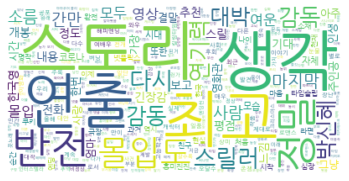

In [14]:
from wordcloud import WordCloud

wc_noun = WordCloud(background_color='white', max_words=2000, 
                     font_path=r'C:\Windows\Fonts\NanumGothic.ttf')
wc_noun = wc_noun.generate_from_frequencies(count_noun)

import matplotlib.pyplot as plt
plt.imshow(wc_noun, interpolation="bilinear")
plt.axis("off")
plt.show()

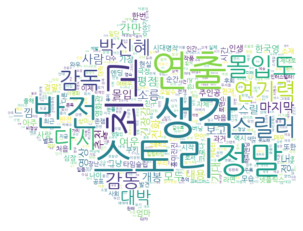

In [15]:
import numpy as np
from PIL import Image

img_mask = np.array(Image.open('way.png'))

wc_img = WordCloud(background_color='white', max_words=5000, font_path=r'C:\Windows\Fonts\NanumGothic.ttf',
                  mask=img_mask)

wc_img = wc_img.generate_from_frequencies(count_noun)

import matplotlib.pyplot as plt
plt.imshow(wc_img, interpolation="bilinear")
plt.axis("off")
plt.show()

## Naive Bayes Classifier


In [16]:
from tqdm.notebook import tqdm

tmp_list = []
txt_list = []
 
for i in tqdm(range(1, 50)):
    url = 'https://movie.naver.com/movie/point/af/list.nhn?&page='+str(i)
    res=requests.get(url)
    soup = BeautifulSoup(res.text)
    tds = soup.select('table.list_netizen > tbody > tr > td.title')
    
    for td in tds:
        movie_title = td.select_one('a.movie').text.strip()
        score = td.select_one('div.list_netizen_score > em').text.strip()
        comment = td.select_one('br').next_sibling.strip()
        print(movie_title, score, comment, sep='\t')
        txt_line = f"{movie_title}\t{score}\t{comment}\n"
        txt_list.append(txt_line)
        tmp_list.append(comment)
    
    time.sleep(0.5)        
print(len(tmp_list))

try:    
    f = open("train.txt",'w','utf-8')
    for txt in txt_list:
        f.write(txt)
except Exception as e:
    print(e)

C:\Users\admin\anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\admin\anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


이웃사촌	9	도청팀이랑 여수댁 너무 웃겨요ㅋㅋㅋ
악인전	10	
이별의 아침에 약속의 꽃을 장식하자	6	힘없는 불멸의 삶은 고통.
콜	9	기대감 없이 본 영화지만 반전과 신선함을 준 영화이다.전 배우들의 연기력은 물론이며,전종서 배우님의 연기력은 정말 대단했습니다.영상연출도 좋았지만 영상 ost도 아주 좋았습니다.또한 스토리 자체도 타임라인을 다룸과 동시에반사회적 인격장애를 풀어낸 것이 아주 인상깊었습니다.
녹터널 애니멀스	10	
백두산	2	정말 배우들이 아깝다는 생각이 ...
콜	10	연기, 연출 모두 훌륭해요
가을의 전설	8	그러게 동생 여자랑 결혼은 하지 말았어야지  그럼에도 불구하고 볼거리 많은 영화는 분명함
가을의 전설	8	한국판 사랑과전쟁같다는.. 연출 영상미는 감히 명작이라고 말할수있음..
봉오동 전투	2	이정도면 판타지.... 일본 중국 욕 할게 아니라  우리나라도 역사외곡  준나 심하네 ㅋ
가을의 전설	10	몇번을 봐도 여운이 남는 영화.
콜	10	코로나 시대가 아니라면 1500만 갔을 영화입니다두젊은 여배우님의 연기가 압권입니다.
콜	8	마지막 장면을 꼭 그렇게 만들었어야 했니?
콜	10	마지막으로 영화 본게 살아있다인데 너무 재밌네요. 반전에 반전에 반전에 반전 와이프랑 술 한 잔하고도 엄청 몰입하고 봤습니다.
롱 리브 더 킹: 목포 영웅	10	ㅎㅎ너무재밌게봤어요!!!
우아한 세계	10	이 시대 아버지의 모습 그대로네요.
리클레임	10	재미있고 부모로서 긴장감 있게 봣음. 좋은 영화임 스토리 엉성해 보이지만 그래더 긴장감 웬만한 약션영화보다 좋음 아마추어성 느낌이 나지만 그래서 약가누더ㅜ실화 같은 느낌.
다만 악에서 구하소서	6	짜장/짬뽕 + 탕수육 + 군만두의 실패할 수가 없는 조합인데, 이상하게 맛이 없다.
앵무새 몸으로 울었다	10	연기력,영상미, 연출, 배경음악 몰입도  네요빗나간 인간의 집착이 무모하고, 고뇌하는인간의처절한삶을 잘 묘사한듯 합니다. 아름다운영상이었어요...
콜	10	전종서님 연기 진짜잘하신다..소름돋네 이분나오는거다봐

극장판 바이올렛 에버가든	10	쿠키 있는데 금방지나가니까 화면 보고 계세요... 제 친구는 노래들으면서 폰보다가 쿠키 놓침 ^^>
콜	10	티비로 봐도 몰입도 최고... 손에 땀을 쥐고 봤음. 모두의 연기가 일품이고 그중 전종서의 연기는 버닝을 능가함.. 극장에서 봤다면 더 좋았을걸 하는영화임. 연출도 씨쥐도 모두 좋았음. 대신 쿠키영상은 뒷끝이 좀 개운치않음.. 그래도 전반적으로 추천함
나의 서른에게	10	서른이기전에 서른이지난다음이라면 꼭 한번 봐야할 영화
콜	10	박신혜 전종서 김성령 연기 정말 잘하네요감탄~!!
콜	10	오랜만에 재밌는 한국영화,, 소름임
콜	10	전종서 배우의 연기가 진짜 미쳤다... 너무 재밌다.... 두번봤네..
콜	10	기대도 안하고 봐서 그런지 엄청나게 재밌음 ㅠㅠ 몰입도 최강 반전의반전의반전의소름이 너무 돋앗어요ㅠㅠ
콜	10	이 영화를 보면서 아.. 이런 영화들을 꼭 영화관에서만 봐야 더 스릴있고 재밋을려나? 집에 불 꺼놓고 봐도 충분히 짜릿함을 선사한 영화라고 생각이됨
일라이	10	다시보고싶은데 넷플릭스에도 iptv에도 안나와서 아쉬운 영화에요.
봉오동 전투	10	
콜	4	박신혜 행동이 너무 답답해서 살인마를 응원하게됬네요...
콜	6	천국과 지옥을 왔다리 갔다리 하는 영화
에이바	2	
백두산	6	영화의 주요줄거리는 미래에 있을법한 이야기를 통해 잘 풀어나갔다고 생각합니다. 실제로 백두산 폭발을 예견하는 뉴스도 나왔었고, 폭발을 우려하는 과학자들도 있습니다. 영화의 내용은 백두산 폭발로 시작합니다. 백두산 폭발을 막기위해 남한에서 북한에 군인들을 파견하는 이야기입니다. 전반적인 스토리는 재밌었습니다. 배우 하정우와 이병헌의 연기 또한 훌륭했다고 생각합니다. 다만 몇가지 아쉬운점들이 있었습니다. 첫번째는 연출력이 좀 아쉬웠다고 생각합니다. 물론 기술력의 한계가 있을지라도 좀 조잡한 느낌이 들었습니다. 두번째는 항상 이러한 영화들은 미국과 북한이 너무 미화되었다고 생각합니다. 영화를보면 삼국의 대립에서 우리나라의 위치보다 타국가

콜	1	스토리가 엉성하고 너무 답답함
악인전	8	뻔하지만 그래도 재밌잖아?
콜	10	연기가 미쳤음 전종서배우는 연기하는 느낌이 아니라 실존인물이 나오는 듯한 연기전개도 끝까지 뻔하지 않고 2번봤어요
콜	8	몰입감 있게 보고 연기 좋은데 다 보고나니 개연성 떨어지는게 생각나고 후반부에 갑자기 엄마는 위대하다 느낌?ㅋㅋㅋㅋ
콜	10	2탄 나오나 안나오나 그것만말해  뚜뚜뚜
다크 섀도우	5	마녀가 이쁜거 빼고는...
콜	1	핵고구마 같은 영화.막판에 어그지에 마지막 뒤집기는 개억지.
삼진그룹 영어토익반	10	
콜	10	간만에 푹빠져서 시간가는줄 모르고 봤다 재밌고 소름소름!!
삼진그룹 영어토익반	10	최근 본 최고의 판타지 영화입니다!!!
콜	10	뭐야 이렇게 끝나? 했다가 마지막 반전 소오름이네요 간만에 너무 재밌게 봤어요 추천!
어거스트 러쉬	1	일단 바로 본론부터 말하면 보는시간이 아깝다는 생각이 들 정도로 보기가 힘들었고 클리셰 범벅이며 심할정도로 운명적인 영화이다. 영화의 스토리의 개연성을 억지로 끼워서 짜맞추는 느낌이 들었고 매우 부자연스러웠다. 어거스트러쉬의 음악적 천재성을 표현하려고 주변사물들의 소리를 합주형식으로 들으며 지휘를 하는 모습, 피아노 음계만 잠깐 배웠을뿐인데 농구공 튀기는 소리,박자만 듣고 수십개의 악보를 그린다던지 하는 모습은 너무 오버하는 느낌과 함께 헛웃음이 나올정도였다. 그것이 감독의 의도라면 이해하겠지만 처음부터 끝까지 너무 천재성을 강조하는 느낌이었다. 게다가 결말, 스토리의 흐름은 그냥 예상이 가는 구조였다. 내가 여태 본 음악영화중 최악인 영화인것 같다. 그나마 영화속에서 나오는 노래와 기타합주정도는 들을만 했지만 처음부터 끝까지 수미상관으로다가 운명적 소리가 자주 들리는데 이는 상당히 억지스러웠다.
콜	10	2...나오는건가요?
삼진그룹 영어토익반	8	기대 안했는데 재밌고 꽤 볼만해여 ㅎㅎ
콜	10	진짜... 연기 미쳤고 시나리오 작가 미쳤다... 너무 무섭다 오늘 혼자 못잘듯 ㅠㅠ
콜	10	너무 무서웠어요~~ 영화관에서

런	10	20OOO 서치에 이은 올해 최고의 영화
최미역행	1	거르고 나 자신을 믿는다
천문: 하늘에 묻는다	10	조선 왕조 역사에 세종과 장영실과 같은 인물들이 여럿 있었다면 참 좋았겠다라는 생각이 들었어요. 보면서 많이 울었습니다.
최미역행	1	정신 나간 놈들인가이걸 우리나라에서 개봉한다고?지들이 이 난리쳐놓고 수습하는 걸 보고 뭐감명깊게 보라 이런거임?절대 안볼거고 만약 국민보다 중국이 더 우선인 각하께서 보신다면 그거 꼭 기사로 내줘라
콜	10	개무섭다. 여운이 남는 영화
콜	10	역대급 빌런 '영숙' 전종서. 여자 조커 급 연기력. 최고 몰입감!
레베카	10	
콜	10	
콜	10	영화 끝날때까지 긴장을 늦출수 없다.
콜	8	간만에 한국영화 끝까지 완주햇네요.. 추천할만해요
프리키 데스데이	10	주인공도 너무 매력적이고 지루할 틈 없이 재밌었습니다.
콜	6	응답하라1988 공포버젼~ㅋㅋ
삼진그룹 영어토익반	10	진짜 몰입되게 하고 최고의연기력이었어요다들 재밌다고 추천하는데는 이유가 있었네요 ㅜㅠ
콜	7	전종서의 연기에 소름이 돋았다. 다음 영화가 기대되는 배우
도굴	8	킬링타임용 영화로 추천합니다 볼만해요
콜	9	엄마생각나서 울다가 눈물 쏙 들어갔네
콜	1	저는 별로에요ㅜ 스토리가 너무 뻔함
어벤져스: 엔드게임	10	
극장판 바이올렛 에버가든	10	내일 세번째로 보러감 ㅇㅇ
콜	10	올해 본 영화중 최고 재밌음. 흡입력 짱짱! 흔한 소재인데 전개가 흥미진진하다. 강추.
콜	10	올해 본 영화중 최고 재밌음. 흡입력 짱짱! 흔한 소재인데 전개가 흥미진진하다. 강추.
콜	10	무서워... 근데 흥미진진
플립	10	연출, 연기, 스토리 하나 빠짐없이 너무 좋아요 진짜...강추
서유기 2 - 선리기연	8	쿵푸허슬, 소림축구를 재밌게 보았고 평가가 좋아서 기대를 했는데 기대가 너무 컷던 것 같다. 현시점에서 보는 옛날영화라 그런 것도 있는거 같기도하고..
콜	10	많이 무서워요 ㅠㅠ 저는 살짝 스킵하면서 봤어요 ㅠㅠ 가능하면 혼자 보지마세요 ㅠㅠ 그래도 스토리랑

In [17]:
 def load_data(file_path):
    train = []
    count = 0
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f.readlines():
            title = ''
            score = ''
            comment = ''
            if count == 500:
                break
            line = line.strip()
            data = line.split('\t')
            if(len(data) < 3):
                title, score = data
            else:
                title, score, comment = data
            score = int(score)
            if score >= 9:  #평점 9점 이상을 긍정 리뷰로 처리
                score = 'pos'
            else:
                score = 'neg'
                
            train.append((comment, score))
            count += 1
    return train

In [18]:
train = load_data('train.txt')
print(train[:5])

[('연기력,영상미, 연출, 배경음악 몰입도  네요빗나간 인간의 집착이 무모하고, 고뇌하는인간의처절한삶을 잘 묘사한듯 합니다. 아름다운영상이었어요...', 'pos'), ('전종서님 연기 진짜잘하신다..소름돋네 이분나오는거다봐야겠다배우들전체적으로 연기 다 너무잘하고어색한거하나 없음 스토리도 너무좋아시그널같아..', 'pos'), ('연출이나 무대세트들은 분위기에 맞게 잘만든거같음근데 중반부로 갈수록 이게 귀신영화인지 좀비영환지 좀 헷갈림;;하정우 애잃은 아빠같지않게 너무 태연하게 연기한거같아서 좀 아쉬웠음 그래도 감독이 뭘 전하고자 하는지는 알겠음', 'neg'), ('태어나서 처음 별점 남겨봄 빡칠때 보면 더 개빡치는 영화', 'neg'), ('몰입력짱 연기력 짱짱임', 'neg')]


In [19]:
from nltk.tokenize import word_tokenize
import nltk

from konlpy.tag import Okt
okt = Okt()

def pos_tokenize(raw_sent):
    pos_sent = []    
    sent = okt.pos(raw_sent, norm=True, stem=True)    
    for tup in sent:        
        word, tag = tup[0], tup[1]
        word_tag = word + '/' + tag
        pos_sent.append(word_tag)
    return ' '.join(pos_sent)

def make_word_dict(train, use_morph=False):
    all_words = set()
    for tup in train:
        sent, label = tup[0], tup[1]    
        if use_morph: sent = pos_tokenize(sent) 
        words = word_tokenize(sent)
        for word in words:
            all_words.add(word)
    return all_words

def make_train_feats(train, all_words, use_morph=False):
    train_features = []
    for tup in train:
        sent, label = tup[0], tup[1]
        if use_morph: sent = pos_tokenize(sent) 
        words = word_tokenize(sent)
        tmp = {set_word: (set_word in words) for set_word in all_words}
        sent_tup = (tmp, label)
        train_features.append(sent_tup)
    return train_features

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
use_morph = True
all_words = make_word_dict(train, use_morph)
print('단어 집합 개수: ', len(all_words))
train_features = make_train_feats(train, all_words, use_morph)

단어 집합 개수:  2117


In [22]:
classifier = nltk.NaiveBayesClassifier.train(train_features)
classifier.show_most_informative_features()

Most Informative Features
          답답하다/Adjective = True              neg : pos    =     11.0 : 1.0
           아깝다/Adjective = True              neg : pos    =     10.0 : 1.0
                 최고/Noun = True              pos : neg    =      9.1 : 1.0
                 과거/Noun = True              neg : pos    =      7.9 : 1.0
                 보기/Noun = True              neg : pos    =      6.8 : 1.0
                 이고/Josa = True              neg : pos    =      6.8 : 1.0
                1/Number = True              neg : pos    =      6.8 : 1.0
                고구마/Noun = True              neg : pos    =      6.8 : 1.0
                성/Suffix = True              neg : pos    =      5.8 : 1.0
                 설정/Noun = True              neg : pos    =      5.8 : 1.0


In [23]:
test_sent1 = '정말 재밌었던 영화'
if use_morph: test_sent = pos_tokenize(test_sent) 
words = word_tokenize(test_sent1)
test_feature = {set_word: (set_word in words) for set_word in all_words}

In [24]:
classifier.classify(test_feature)

'pos'

In [25]:
test_sent2 = '아름다운 영화'

if use_morph: test_sent = pos_tokenize(test_sent)   # pos_tokenize 함수 추가
words = word_tokenize(test_sent2)
test_feature = {set_word: (set_word in words) for set_word in all_words}

In [26]:
classifier.classify(test_feature)

'pos'

In [27]:
test_sent3 = '올해 최고의 영화'

if use_morph: test_sent = pos_tokenize(test_sent)
words = word_tokenize(test_sent3)
test_feature = {set_word: (set_word in words) for set_word in all_words}

In [28]:
classifier.classify(test_feature)

'pos'

# 컴퓨터공학부 201602391 박현우